# 단어 빈도 그래프

In [1]:
import nltk

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /Users/mkw/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [3]:
from nltk.corpus import gutenberg
file_names = gutenberg.fileids()

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [4]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('#Num of characters used: ', len(doc_alice))
print('#Text sample: ')
print(doc_alice[:500])

#Num of characters used:  144395
#Text sample: 
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [6]:
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice)

print('#Num of tokens used: ', len(tokens_alice))
print('#Token sample: ')
print(tokens_alice[:20])

#Num of tokens used:  33494
#Token sample: 
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [7]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]

print('#Num of tokens after stemming: ', len(stem_tokens_alice))
print('#Tokens sample: ')
print(stem_tokens_alice[:20])

#Num of tokens after stemming:  33494
#Tokens sample: 
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]
print('#Num of tokens after lemmatization:', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#Num of tokens after lemmatization: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


In [9]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [10]:
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))

result_alice = [word for word in reg_tokens_alice if word not in english_stops]

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')
print(result_alice[:20])

#Num of tokens after stopword elimination: 12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [11]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
    
print('#Num of used words: ', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key = alice_word_count.get, reverse = True)

print('#Top 20 high frequency words: ')
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end = ', ')

#Num of used words:  2687
#Top 20 high frequency words: 
'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

In [12]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

print('#Num of used words: ', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key = alice_word_count.get, reverse = True)

print('#Top 20 high frequency words: ')
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end = ', ')

#Num of used words:  1726
#Top 20 high frequency words: 
'said': 462, 'alice': 293, 'little': 124, 'went': 83, 'time': 71, 'queen': 66, 'began': 58, 'way': 56, 'turtle': 56, 'mock': 55, 'thought': 54, 'thing': 49, 'voice': 48, 'head': 46, 'gryphon': 45, 'got': 44, 'rabbit': 42, 'looked': 42, 'see': 42, 'came': 40, 

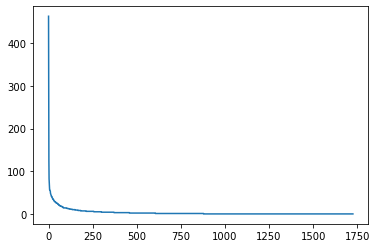

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

w = [alice_word_count[key] for key in sorted_word_count]

plt.plot(w)
plt.show()

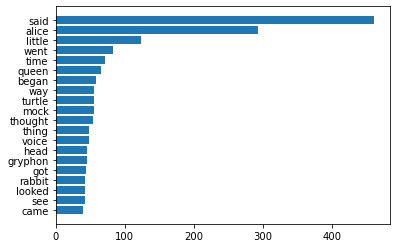

In [19]:
n = sorted_word_count[:20][::-1]
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)), w, tick_label = n)
plt.show()

# 워드 클라우드

In [27]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 3.4 MB/s eta 0:00:00a 0:00:01


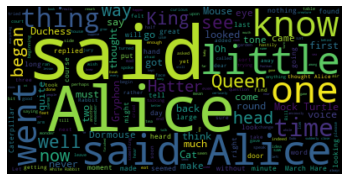

(200, 400, 3)

In [30]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(doc_alice)

plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

wordcloud.to_array().shape

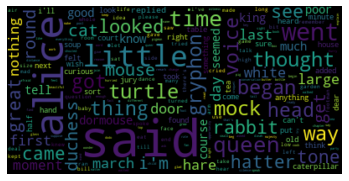

In [42]:
wordcloud = WordCloud(max_font_size = 60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()